## Gradient Descent - Combined Cycle Power Plant
Combined Cycle Power Plant dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
You are given:
    1. A Readme file for more details on dataset. 
    2. A Training dataset csv file with X train and Y train data
    3. A X test File and you have to predict and submit predictions for this file.
Your task is to:
    1. Code Gradient Descent for N features and come with predictions.
    2. Try and test with various combinations of learning rates and number of iterations.
    3. Try using Feature Scaling, and see if it helps you in getting better results. 
Read Instructions carefully -
    1. Use Gradient Descent as a training algorithm and submit results predicted.
    2. Files are in csv format, you can use genfromtxt function in numpy to load data from csv file. Similarly you can use savetxt function to save data into a file.
    3. Submit a csv file with only predictions for X test data. File should not have any headers and should only have one column i.e. predictions. Also predictions shouldn't be in exponential form.
    4. Your score is based on coefficient of determination. So it can be possible that nobody gets full score.



In [3]:
import numpy as np
import pandas as pd

In [6]:
# Loading Datasets

train_dataset = np.genfromtxt("../training_ccpp_x_y_train.csv", names = True, delimiter = ",")
train_df = pd.DataFrame(train_dataset)
train_df['AP'] *= 100 # milibar to Pa
train_df['V'] *= 1333.22387415 # cm Hg to Pa
train_df['T'] += 273.15 # degree celcius to Kelvin
print(train_df.describe())
num_cols = len(train_df.columns)
X_train = train_df.values[:, 0: num_cols -1 ]
Y_train = train_df.values[:, num_cols - 1]
print(X_train.shape)
print(Y_train.shape)

# print(X_train)
# print(Y_train)

test_dataset = np.genfromtxt("../test_ccpp_x_test.csv", names = None, delimiter = ",")
test_df = pd.DataFrame(test_dataset)
test_df.columns = train_df.columns[:-1]

#formula = (18.678 - (test_df[T] / 234.5)) * (test_df[T]/(257.14 + test_df[T]))
#test_df[RH] = (611.21 * (math.e ** formula)) * ()

test_df['AP'] *= 100 # milibar to Pa
test_df['V'] *= 1333.22387415 # cm Hg to Pa
test_df['T'] += 273.15 # degree celcius to Kelvin

print(test_df.describe())
num_cols = len(test_df.columns)
X_test = test_df.values

print(X_test.shape)

# print(X_train)

                 T              V             AP           RH           EP
count  7176.000000    7176.000000    7176.000000  7176.000000  7176.000000
mean    292.779712   72378.262420  101326.303233    73.275818   454.431293
std       7.475256   17000.561104     596.486348    14.625093    17.134571
min     274.960000   33810.557448   99289.000000    25.560000   420.260000
25%     286.620000   55648.764507  100901.000000    63.202500   439.737500
50%     293.465000   69394.302650  101291.000000    74.895000   451.740000
75%     298.870000   88712.716586  101730.250000    84.925000   468.667500
max     308.920000  108737.739176  103330.000000   100.160000   495.760000
(7176, 4)
(7176,)
                T              V             AP           RH
count  2392.00000    2392.000000    2392.000000  2392.000000
mean    292.86579   72472.388843  101324.721572    73.408457
std       7.38488   16770.306636     586.106832    14.528135
min     276.53000   33810.557448   99374.000000    26.670000
25

In [7]:
# Introduce more features
def add_more_features (X_train, imp_cols_indices = []):
    X_train_df = pd.DataFrame(X_train)
    num_f = len(X_train_df.columns)
    col_names = X_train_df.columns
    if len(imp_cols_indices) == 0 :
        imp_cols_indices = np.arange(num_f)
        
    new_df = X_train_df.copy()
    num_imp_cols = len(imp_cols_indices)
    for i1 in range(num_imp_cols) :
        for j1 in range(i1, num_imp_cols):
            i = imp_cols_indices[i1]
            j = imp_cols_indices[j1]
            new_df[ str(col_names[i]) + "_" + str(col_names[j])] = X_train_df[i] * X_train_df[j]
    #print(new_df.describe())
    return new_df.values

def scale_features(X_train) :
    import copy
    X = copy.deepcopy(X_train)
    means = np.array([X[:, i].mean() for i in range(X.shape[1])])
    stds = np.array([X[:, i].std() for i in range(X.shape[1])])
    
    for i in range(X.shape[0]) :
        X[i, :] = (X[i, :] - means)/stds
    return X

X_train_new = add_more_features(X_train)
X_train_scaled = scale_features(X_train_new)


X_test_new = add_more_features(X_test)
X_test_scaled = scale_features(X_test_new)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(7176, 14)
(2392, 14)


In [8]:
def single_step(X, Y, m, alpha):
    n_1 = len(m)
    num_eg = len(X)
    slope_m = np.zeros(n_1) 
    
    for j in range(n_1):
        for i in range(num_eg) :
            slope_m[j] += (-2/num_eg)* ((Y[i] - (m *(X[i])).sum() ) * X[i][j] )    
    #for j in range(n_1):
            m[j] -= alpha*slope_m[j]
    return m

def cost(X, Y, m):
    cost = 0
    num_eg = len(X)
    for i in range(num_eg) :
        cost += ((Y[i] - (m * X[i]).sum())**2 )/num_eg
    return cost

def gd(X, Y, alpha, num_iters):
    num_eg = len(X)
    X = np.c_[X, np.ones(X.shape[0])]
    m = np.zeros(len(X[0]))
    costs = {}
    #print(len(m))
    for i in range(num_iters):
        m = single_step(X, Y, m, alpha)
        if i % 50 == 0 :
            costs[i] = cost(X, Y, m)
            print(i, " ", costs[i])
    import matplotlib.pyplot as plt
    keys = [key for key in costs]
    values = [costs[key] for key in costs]
    plt.plot(keys, values)
    plt.show()
    return m

def predict(X, m) :
    X = np.c_[X, np.ones(X.shape[0])]
    Y = np.array([])
    for i in range(len(X)):
        Y_i = (X[i] * m).sum()
        Y = np.append(Y, Y_i)
    return Y


def score(Y_true, Y_pred) :
    mean = Y_true.mean()
    u = ((Y_true - Y_pred)**2).sum()
    v = ((Y_true - mean)**2).sum() 
    return 1 - (u/v)


In [9]:
from numpy.random import choice 
def gen_linear_regressors(X_train, Y_train, subset_size_ratio, num_regressors, alpha, num_iters) :
    n_plus_1 = len(X_train[0]) + 1
    num_examples = len(X_train)
    sub_set_size = int(subset_size_ratio * num_examples) 
    arr_m = np.empty((0, n_plus_1), dtype = float)
    print(arr_m.shape)
    for i in range(num_regressors) :
        subset_indices = choice(num_examples, sub_set_size, replace = False)
        X_i = X_train[subset_indices]
        Y_i = Y_train[subset_indices]
        m_i = gd(X_i, Y_i, alpha, num_iters)
        arr_m = np.vstack((arr_m, m_i))
        #arr_m = np.append(arr_m, m_i, axis = 0)
        print(arr_m.shape)
    return arr_m
def predict_from_models(X, arr_m):
    Y_pred_means = np.zeros(len(X))
    for i in range(len(arr_m)) :
        Y_pred = predict(X, arr_m[i])
        #print(i, " ", Y_pred)
        Y_pred_means += Y_pred
    Y_pred_means /= len(arr_m)
    return Y_pred_means

In [ ]:
#scaled_X_train = scale_features(X_train)
#scaled_X_df = pd.DataFrame(scaled_X_train)
#scaled_X_df.describe()

In [10]:
imp_col_indices = np.arange(13) #[2, 4, 6, 8, 9]
import time
s_t = time.time()


arr_m = gen_linear_regressors(X_train_scaled, Y_train, 0.75, 10, 0.0005, 1000)

print(arr_m)
# m = gd(X_train_new, Y_train, 0.0007, 1000)

# print(m)
e_t = time.time()
print("Duration: ",e_t-s_t, "second")

(0, 15)
0   95744.56537009904
50   20.048774987047338
100   19.74237607686076
150   19.640869325856162
200   19.604197330981837
250   19.584191151786083
300   19.56996579492437
350   19.55835037573232
400   19.547909154217763
450   19.53807923455141
500   19.52872657632142
550   19.519851289803942
600   19.511464194878116
650   19.503558331091345
700   19.496112422023938
750   19.489098925162203
800   19.482489276908577
850   19.4762561432312
900   19.47037399151827
950   19.46481901655276


<Figure size 640x480 with 1 Axes>

(1, 15)
0   95772.14021350558
50   19.55734765411506
100   19.306625915875834
150   19.235515160100736
200   19.212972455598152
250   19.198565522923797
300   19.185796138497185
350   19.174060087032828
400   19.16315051426085
450   19.152922691462575
500   19.143301008796207
550   19.134239242608615
600   19.12569922017644
650   19.117646261795695
700   19.11004871566732
750   19.102877543947148
800   19.09610577382664
850   19.089708076236388
900   19.083660529873416
950   19.07794051087137


<Figure size 640x480 with 1 Axes>

(2, 15)
0   95797.35145566771
50   19.775637230129128
100   19.507345229196506
150   19.425050120492617
200   19.3933858404437
250   19.37536412310751
300   19.362243754354875
350   19.35088537181974
400   19.340108429315894
450   19.329684216542315
500   19.319682281862757
550   19.31018132734199
600   19.301206999876005
650   19.292746182667155
700   19.28476928473527
750   19.27724347129801
800   19.27013776658245
850   19.26342401914221
900   19.257076493588364
950   19.251071317970013


<Figure size 640x480 with 1 Axes>

(3, 15)
0   95899.52600688768
50   20.0458323367411
100   19.739649554977085
150   19.638864662865593
200   19.60549864053323
250   19.58961850194264
300   19.578746936341265
350   19.56948639792797
400   19.560719432066875
450   19.552196286305396
500   19.543963215225798
550   19.5360978082478
600   19.528635764821708
650   19.52157554756454
700   19.514897265210497
750   19.508575703731324
800   19.5025861303099
850   19.496905892920353
900   19.491514358488836
950   19.4863924866089


<Figure size 640x480 with 1 Axes>

(4, 15)
0   95850.53811180357
50   19.672286280721547
100   19.376739141607725
150   19.27984968855034
200   19.24708077622988
250   19.2308977114439
300   19.21992542279151
350   19.210838357197957
400   19.202347047090196
450   19.194090239471752
500   19.18607498686077
550   19.17837346502984
600   19.171026174579907
650   19.164037520128367
700   19.1573924350749
750   19.15106945705541
800   19.14504698062394
850   19.139305157691915
900   19.13382595986012
950   19.128592785510623


<Figure size 640x480 with 1 Axes>

(5, 15)
0   95839.07178514394
50   20.284079088811104
100   19.991125105920293
150   19.880108297522916
200   19.837994116840374
250   19.816441228116876
300   19.802265519698604
350   19.791275335810727
400   19.78159546948558
450   19.77247397539985
500   19.763725032520732
550   19.755356189969433
600   19.74739836902709
650   19.739860094934432
700   19.732728900568915
750   19.72598183030799
800   19.71959308143142
850   19.713537572181387
900   19.70779199769185
950   19.702334833048948


<Figure size 640x480 with 1 Axes>

(6, 15)
0   95839.86048424174
50   19.93852171677594
100   19.665050197903724
150   19.600980007474945
200   19.57934113593507
250   19.563206364579568
300   19.549636268808825
350   19.538085351920476
400   19.527778771840886
450   19.51824826322335
500   19.50929893198445
550   19.5008574214087
600   19.49289087993625
650   19.485376093182794
700   19.478289979343437
750   19.471608137796384
800   19.46530573311436
850   19.45935848876052
900   19.453743241381957
950   19.448438126526774


<Figure size 640x480 with 1 Axes>

(7, 15)
0   95901.09834160772
50   20.237719098833853
100   20.011215700635994
150   19.93764409785395
200   19.912303836631562
250   19.897759069064644
300   19.886485620860533
350   19.8767771946376
400   19.867867694524552
450   19.859451555667544
500   19.851462180486564
550   19.843899066994126
600   19.83675925763601
650   19.830026666922592
700   19.823677544045047
750   19.817686126648923
800   19.812027503739177
850   19.80667847145621
900   19.8016175104205
950   19.79682454956932


<Figure size 640x480 with 1 Axes>

(8, 15)
0   95868.88947670076
50   20.293244854062323
100   20.050857278604663
150   19.97133679898658
200   19.94215564034599
250   19.925303292564347
300   19.91230246070379
350   19.900890098199547
400   19.890217111066672
450   19.880044981358324
500   19.870366977026062
550   19.8612100436633
600   19.852577189713728
650   19.844448738063885
700   19.836794550135757
750   19.829582427402755
800   19.822781684984978
850   19.816363989564074
900   19.810303179167644
950   19.804574905896963


<Figure size 640x480 with 1 Axes>

(9, 15)
0   95777.95724483987
50   19.746939896016393
100   19.48210672587936
150   19.410020937006077
200   19.387250241278032
250   19.373503342802636
300   19.362744108122484
350   19.353701011352875
400   19.3455763139819
450   19.337988796846986
500   19.330822489953945
550   19.32405220876948
600   19.317666825244995
650   19.31165051834325
700   19.30598261978378
750   19.300640584511903
800   19.29560209098432
850   19.29084594840434
900   19.286352303415192
950   19.282102577551722


<Figure size 640x480 with 1 Axes>

(10, 15)
[[-16.77565839   9.68703686  11.79831118  -7.80439784  15.83252778
  -10.35086023 -10.48521792  -7.676618     6.9421925   -6.33940517
   -4.2635195   -9.16846801  19.37685002  -2.23847889 454.40943182]
 [-14.2430204    7.64365931  11.98659287  -9.600802    14.35396736
   -8.51163006 -11.62079959  -7.2862313    6.73089754  -5.12167504
   -5.09062969  -9.18818598  21.01551262  -1.77305404 454.44591587]
 [-15.30517527   7.91586633  12.07196945 -10.61228769  13.75459376
   -9.19430813 -10.19400594  -6.31052538   6.34814024  -4.49121235
   -4.90125909  -9.53359143  20.465211    -1.53213318 454.37769854]
 [-16.15147284   8.58693629  11.24626147  -8.15035074  14.39394729
   -9.19634019 -10.08717978  -6.17305664   6.46877659  -5.26228376
   -4.88239379  -8.68529329  18.50181089  -2.16113589 454.50431012]
 [-18.01326683   9.49180189  11.62615991  -8.59174742  15.22633392
  -10.48178852  -9.31367724  -4.34683166   6.91612295  -5.76564844
   -4.44577703  -9.18966131  15.888553    -1.4970

In [ ]:
"""
m_a = np.delete(arr_m, 3, axis = 0)
print(m_a.shape)
print(m_a)
arr_m = m_a 

"""

In [11]:
# Finding Predictions

Y_pred =  predict_from_models(X_test_scaled, arr_m)
#print(Y_pred)
#Y_pred = predict(X_test_new, m)
np.savetxt("boston_dataset_pred.csv", Y_pred, '%.5f')


In [ ]:
Y_train_pred = predict_from_models(X_train_new, arr_m)
Y_train_pred = np.around(Y_train_pred, 2)

Y_error = np.absolute(Y_train - Y_train_pred)
Y_error = np.around(Y_error, 2)

Y_error_sq = Y_error ** 2
Y_error_sq = np.around(Y_error_sq, 2)

Y_error_perc = (Y_error*100 )/Y_train
Y_error_perc = np.around(Y_error_perc, 2)
dict = {
    "Y_train" : Y_train,
    "Y_train_pred" : Y_train_pred, 
    "Y_error" : Y_error, 
    "Y_error_perc" : Y_error_perc, 
    "Y_error_sq" : Y_error_sq
}
error_data_df = pd.DataFrame(dict)
""" print("i", " ", "Y_train", " ", "Y_train_pred", " ", "Y_error", " ", "Y_error_perc" , " ", "Y_error_sq")

for i in range(len(Y_train)) :
    print(i, "\t", Y_train[i], "\t", Y_train_pred[i], "\t", Y_error[i], "\t", Y_error_perc[i] , "\t", Y_error_sq[i])
    #print(i, " ", Y_train[i], " ", Y_error_sq[i])
"""
print(score(Y_train, Y_train_pred))
print(error_data_df)
print(error_data_df.describe())

import matplotlib.pyplot as plt
plt.scatter(Y_train, Y_error)
plt.show()
plt.scatter(Y_train, Y_error_perc)
plt.show()
plt.scatter(Y_train, Y_error_sq)
plt.show()


0   19.482703451051304
50   19.48659152977768
100   19.485283236886062
150   19.482078418646488
200   19.477980458571995
250   19.473853599965803
300   19.470346822353772
350   19.4675753756068
400   19.4653647694608
450   19.463527958646868
500   19.461950990050166
550   19.460575803356754
600   19.45936896674121
650   19.458303986427214
700   19.457355909368765
750   19.456501457970894
800   19.455720144589094
850   19.454994730007453
900   19.454311006252343
950   19.453657306540904


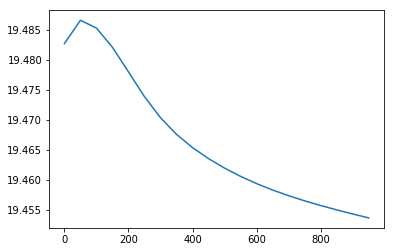

0.9337323686456772


In [14]:
# Boosting Gradient Descent
def GBD(X_train, Y_train, arr_m, error_alpha, error_num_iters) :
    Y_pred =  predict_from_models(X_train, arr_m)
    error_train = Y_train - Y_pred
    m_error = gd(X_train, error_train, error_alpha, error_num_iters)
    return m_error
def predict_using_error(X_test, arr_m, m_error) :
    Y_pred =  predict_from_models(X_test, arr_m)
    error_pred = predict(X_test, m_error)
    Y_pred_final = Y_pred + error_pred
    return Y_pred_final
#arr_m = gen_linear_regressors(X_train_scaled, Y_train, 0.75, 5, 0.0001, 500)

m_error = GBD(X_train_scaled, Y_train, arr_m, 0.0005, 1000)


Y_pred_final = predict_using_error(X_test_scaled, arr_m, m_error)

Y_train_pred_final = predict_using_error(X_train_scaled, arr_m, m_error)

print(score(Y_train, Y_train_pred_final))

#Y_pred =  predict_from_models(X_test_scaled, arr_m)
#print(Y_pred)
#Y_pred = predict(X_test_new, m)

#np.savetxt("boston_dataset_pred.csv", Y_pred, '%.5f')


In [17]:
np.savetxt("ccpp_dataset_pred.csv", Y_pred_final, '%.5f')

0.9337323762716002
      Y_train  Y_train_pred  Y_error  Y_error_perc  Y_error_sq
0      482.26        480.32     1.94          0.40        3.76
1      446.94        449.51     2.57          0.58        6.60
2      452.56        459.83     7.27          1.61       52.85
3      433.44        430.68     2.76          0.64        7.62
4      480.38        477.18     3.20          0.67       10.24
5      436.36        441.05     4.69          1.07       22.00
6      485.36        478.17     7.19          1.48       51.70
7      481.59        477.34     4.25          0.88       18.06
8      432.56        430.67     1.89          0.44        3.57
9      449.48        452.95     3.47          0.77       12.04
10     460.49        458.16     2.33          0.51        5.43
11     470.17        467.53     2.64          0.56        6.97
12     473.41        469.06     4.35          0.92       18.92
13     488.50        489.26     0.76          0.16        0.58
14     467.33        467.42     0.09

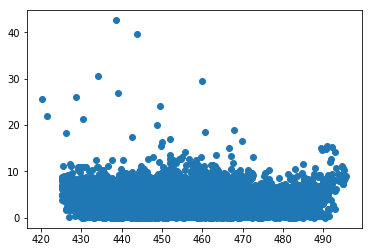

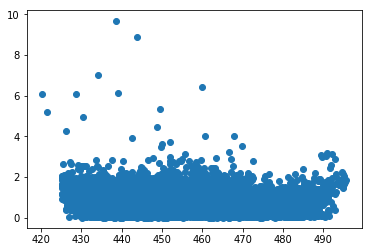

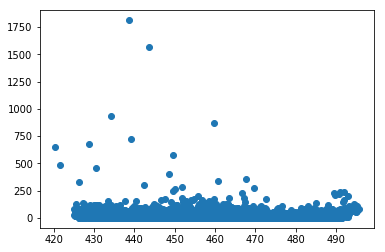

{482.26: 476.34, 446.94: 441.45, 452.56: 449.67, 433.44: 434.69, 480.38: 480.15, 436.36: 440.52, 485.36: 480.72, 481.59: 477.34, 432.56: 437.62, 449.48: 453.14, 460.49: 458.16, 470.17: 471.97, 473.41: 474.13, 488.5: 489.26, 467.33: 465.4, 430.67: 437.04, 458.57: 457.78, 438.33: 437.47, 451.38: 453.06, 440.23: 437.89, 438.83: 438.26, 472.04: 474.13, 465.37: 464.11, 441.32: 438.81, 470.41: 466.9, 451.84: 445.73, 434.54: 438.65, 444.0: 452.14, 489.95: 482.43, 472.86: 473.87, 435.84: 436.86, 440.99: 446.05, 443.89: 436.72, 473.33: 476.82, 442.0: 441.47, 481.45: 478.15, 436.89: 437.46, 450.62: 459.99, 447.88: 440.32, 452.21: 449.09, 476.68: 471.85, 440.06: 443.96, 460.08: 454.87, 439.4: 441.72, 467.32: 468.15, 482.56: 483.37, 437.04: 442.04, 454.19: 459.62, 434.66: 432.91, 478.19: 482.97, 484.54: 479.91, 436.5: 434.13, 445.41: 448.55, 446.42: 446.48, 444.99: 448.85, 495.21: 484.96, 486.2: 481.03, 434.41: 435.68, 438.0: 439.09, 456.12: 458.86, 444.09: 436.31, 440.83: 440.46, 484.0: 476.83, 4

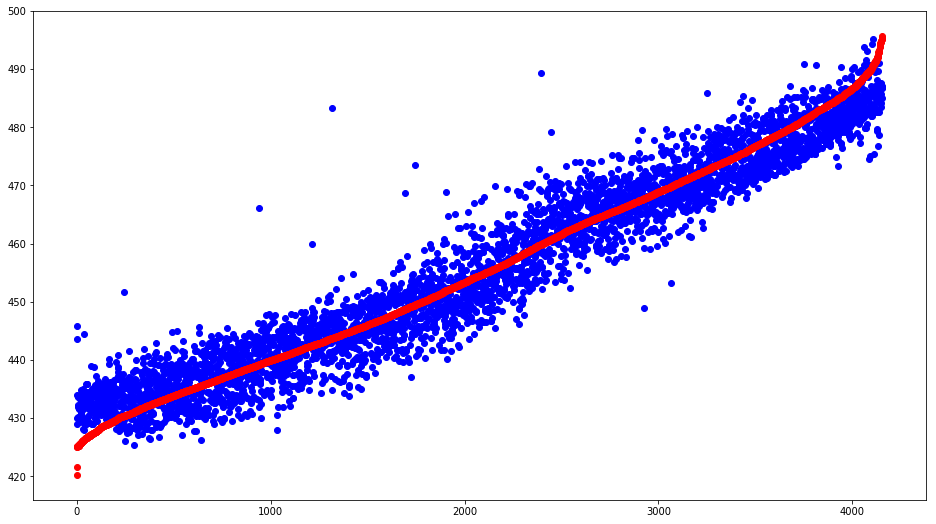

In [28]:
import copy
Y_train_pred = copy.deepcopy(Y_train_pred_final) 
Y_train_pred = np.around(Y_train_pred, 2)

Y_error = np.absolute(Y_train - Y_train_pred)
Y_error = np.around(Y_error, 2)

Y_error_sq = Y_error ** 2
Y_error_sq = np.around(Y_error_sq, 2)

Y_error_perc = (Y_error*100 )/Y_train
Y_error_perc = np.around(Y_error_perc, 2)
dict = {
    "Y_train" : Y_train,
    "Y_train_pred" : Y_train_pred, 
    "Y_error" : Y_error, 
    "Y_error_perc" : Y_error_perc, 
    "Y_error_sq" : Y_error_sq
}
error_data_df = pd.DataFrame(dict)
""" print("i", " ", "Y_train", " ", "Y_train_pred", " ", "Y_error", " ", "Y_error_perc" , " ", "Y_error_sq")

for i in range(len(Y_train)) :
    print(i, "\t", Y_train[i], "\t", Y_train_pred[i], "\t", Y_error[i], "\t", Y_error_perc[i] , "\t", Y_error_sq[i])
    #print(i, " ", Y_train[i], " ", Y_error_sq[i])
"""
print(score(Y_train, Y_train_pred))
print(error_data_df)
print(error_data_df.describe())

import matplotlib.pyplot as plt
plt.scatter(Y_train, Y_error)
plt.show()
plt.scatter(Y_train, Y_error_perc)
plt.show()
plt.scatter(Y_train, Y_error_sq)
plt.show()

import copy
dict = {}
for i in range(len(Y_train)):
    dict[Y_train[i]] = Y_train_pred[i]
print(dict)
#Y_train_sorted = (copy.deepcopy(Y_train)).sort()
#Y_pred_sorted = (copy.deepcopy(Y_train_pred)).sort()

Y1 = list(dict.keys())
Y1.sort()
Y2 = [dict[key] for key in Y1]

xs = np.arange(len(Y1)) 
plt.figure(figsize = (16, 9))
plt.scatter(xs, Y2, color = 'b')
plt.scatter(xs, Y1, color = 'r')

plt.show()